In [1]:
  >>> import nltk
  >>> nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Us

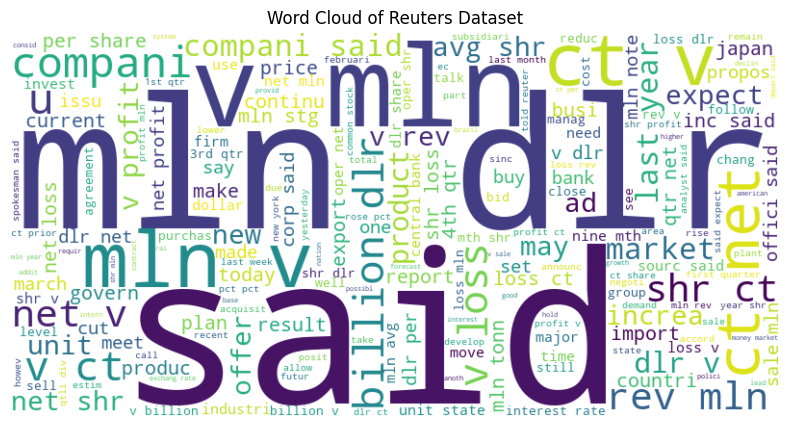

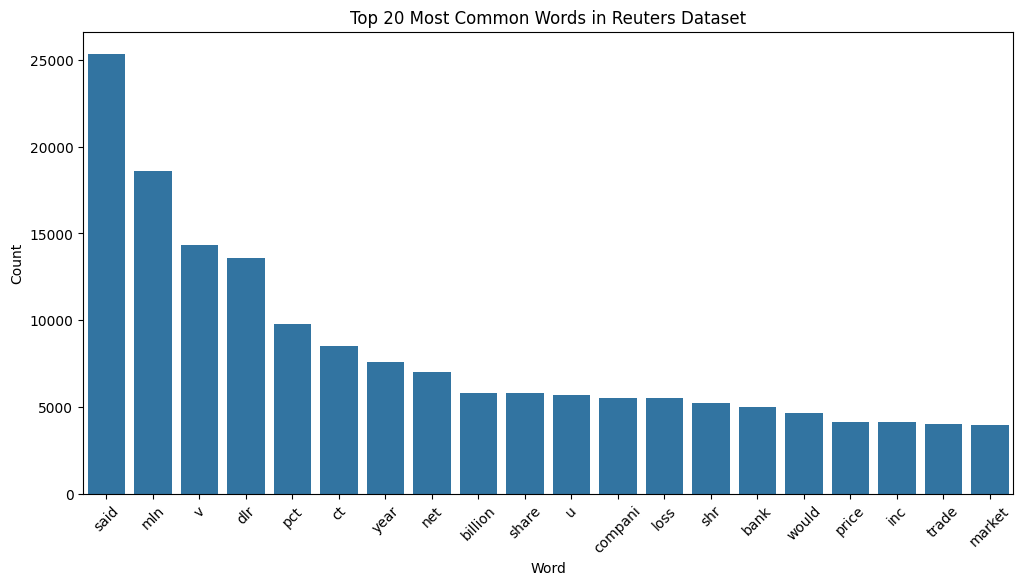

,text,category,cleaned_text
0,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,trade,asian export fear damag usjapan rift mount tra...
1,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,grain,china daili say vermin eat 712 pct grain stock...
2,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,crude,japan revis longterm energi demand downward mi...
3,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER\n ...,corn,thai trade deficit widen first quarter thailan...
4,INDONESIA SEES CPO PRICE RISING SHARPLY\n Ind...,palm-oil,indonesia see cpo price rise sharpli indonesia...


In [9]:
import nltk
nltk.download('punkt')  # Ensure correct package is downloaded
nltk.download('stopwords')  # If stopwords are needed
nltk.download('wordnet')  # If using lemmatization

import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset (Using a sample dataset from NLTK)
from nltk.corpus import reuters
nltk.download('reuters')

# Extract text and categories from Reuters dataset
documents = reuters.fileids()
data = {'text': [], 'category': []}

for doc in documents:
    category = reuters.categories(doc)[0]  # Use the first category
    text = reuters.raw(doc)
    data['text'].append(text)
    data['category'].append(category)

df = pd.DataFrame(data)

# Handling missing values
df['text'] = df['text'].fillna('')  # Fill missing text with an empty string
df['category'] = df['category'].fillna('Unknown')  # Fill missing categories with 'Unknown'

# Preprocessing function
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess_text)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=500)
X_tfidf = vectorizer.fit_transform(df['cleaned_text'])

# Word2Vec Embeddings
tokenized_text = [text.split() for text in df['cleaned_text']]
w2v_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Visualization: Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['cleaned_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Reuters Dataset")
plt.show()

# Visualization: Most Frequent Words (Bar Chart)
word_counts = Counter(" ".join(df['cleaned_text']).split())
common_words = word_counts.most_common(20)
common_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

plt.figure(figsize=(12,6))
sns.barplot(x="Word", y="Count", data=common_df)
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words in Reuters Dataset")
plt.show()

# Summary output
df.head()
